## ML Engineer : SKLearn Refresher

In [91]:
import numpy as np
from numpy.random import default_rng

from sklearn.datasets import load_svmlight_file
train = load_svmlight_file('../dataset/aclImdb/train/labeledBow.feat', n_features=89527)
test = load_svmlight_file('../dataset/aclImdb/test/labeledBow.feat', n_features=89527)

X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]

#### Subset data to 2500 obs, 2500 features

In [92]:
# subset features, first 2500
subset_col = np.arange(0, 2500)
# subset obs, random
rng = default_rng(seed=1)
subset_obs = rng.choice(X_train.shape[0], 2500)

In [93]:
X_train = X_train[subset_obs][:,subset_col]
y_train = y_train[subset_obs]
X_test = X_test[subset_obs][:,subset_col]
y_test = y_test[subset_obs]

### KNN

In [77]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [78]:
knn = KNeighborsClassifier(n_neighbors=20)

In [79]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [80]:
knn.score(X_test, y_test)

0.232

### Logisttic, LinearSVM, SVM

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn import datasets
digits = datasets.load_digits()

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target)

In [82]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.9666666666666667


In [83]:
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

0.9822222222222222


### Visualize decision boundary

In [108]:
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn import datasets

wine = datasets.load_wine()
X, y = wine.data[:,:2], wine.target
models = [LogisticRegression(), LinearSVC(), SVC(), KNeighborsClassifier()]

fits = [m.fit(X, y) for m in models]

In [58]:
def make_meshgrid(x, y, h=.02, lims=None):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """

    if lims is None:
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
    else:
        x_min, x_max, y_min, y_max = lims
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, proba=False, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    if proba:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
        Z = Z.reshape(xx.shape)
        out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), 
                        origin='lower', vmin=0, vmax=1, **params)
        ax.contour(xx, yy, Z, levels=[0.5])
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
    return out

def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1, lims=lims)

    if ax is None:
        plt.figure()
        ax = plt.gca()
        show = True
    else:
        show = False

    # can abstract some of this into a higher-level function for learners to call
    cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
    if proba:
        cbar = plt.colorbar(cs)
        cbar.ax.set_ylabel('probability of red $\Delta$ class', fontsize=20, rotation=270, labelpad=30)
        cbar.ax.tick_params(labelsize=14)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
    labels = np.unique(y)

    if len(labels) == 2:
        ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
        ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
    else:
        ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    # ax.set_xlabel(data.feature_names[0])
    # ax.set_ylabel(data.feature_names[1])

    if ticks:
        ax.set_xticks(())
        ax.set_yticks(())
        # ax.set_title(title)
    if show:
        plt.show()
    else:
        return ax

### Coefficient , Intercept relation with decision boundary

In [159]:
wine = datasets.load_wine()
X, y = wine.data, wine.target
# filter target class 0, 1
target_class = ((y == 0) | (y == 1))
X = X[target_class, :2]
y = y[target_class]

logreg = LogisticRegression()
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)

[[-3.34082148 -0.13319067]]
[43.95413394]


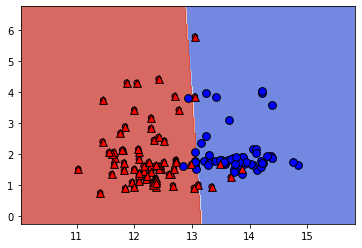

In [161]:
plot_classifier(X, y, logreg)

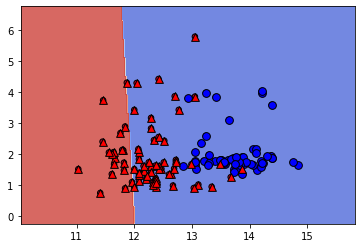

0.5923076923076923


In [180]:
logreg.coef_ = np.array([[-3, -0.1]])
logreg.intercept_ = np.array([36])
plot_classifier(X, y, logreg)
print(logreg.score(X,y))

In [181]:
wine.target.shape

(178,)

### Loss Function

In [8]:
import numpy as np
from sklearn import datasets
from scipy.optimize import minimize

house = datasets.load_boston()
X, y = house.data, house.target

In [9]:
def my_loss(w):
    """The squared error, summed over training examples"""
    s = 0
    for i in range(y.size):
        # Get the true and predicted target values for example 'i'
        y_i_true = y[i]
        y_i_pred = w@X[i]
        s = s + (y_i_true - y_i_pred)**2
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

[-9.28964202e-02  4.87151794e-02 -4.05735725e-03  2.85400577e+00
 -2.86850386e+00  5.92816001e+00 -7.26911753e-03 -9.68512940e-01
  1.71155695e-01 -9.39657198e-03 -3.92188452e-01  1.49054831e-02
 -4.16303722e-01]


### Log-loss, Hinge-loss

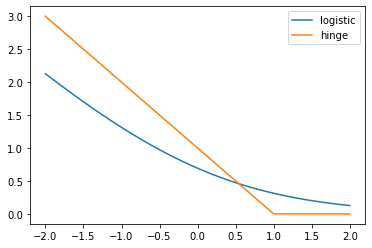

In [16]:
from matplotlib import pyplot as plt

# Mathematical functions for logistic and hinge losses
def log_loss(raw_model_output):
   return np.log(1+np.exp(-raw_model_output))
def hinge_loss(raw_model_output):
   return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.show()

In [66]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import datasets
from sklearn.linear_model import LogisticRegression

cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

In [22]:
# The logistic loss, summed over training examples
def my_loss(w):
    s = 0
    for i in range(y.shape[0]):
        raw_model_output = w@X[i]
        s = s + log_loss(raw_model_output * y[i])
    return s

# Returns the w that makes my_loss(w) smallest
w_fit = minimize(my_loss, X[0]).x
print(w_fit)

# Compare with scikit-learn's LogisticRegression
lr = LogisticRegression(fit_intercept=False, C=1000000).fit(X,y)
print(lr.coef_)

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
[[ 1.08230679  0.51034857  0.25986904 -0.01650424 -0.04095221 -0.19158047
  -0.26806117 -0.11303074 -0.05670071 -0.01136174  0.04742867  0.43295209
   0.17832571 -0.13248439 -0.00368139 -0.04098984 -0.05716236 -0.01467873
  -0.01369201 -0.00381584  1.15081266 -0.57706209 -0.2472958  -0.01467957
  -0.07410044 -0.59616846 -0.74201756 -0.21719728 -0.17925041 -0.05748193]]


## Regularization

In [64]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from matplotlib import pyplot as plt

digits = datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

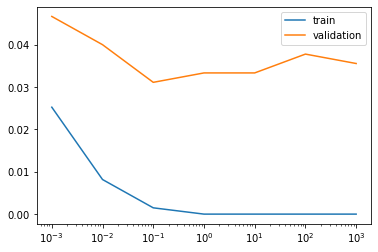

In [45]:
train_errs = []
test_errs = []
reg_list = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in reg_list:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)

    train_errs.append(1.0 - lr.score(X_train, y_train))
    test_errs.append(1.0 - lr.score(X_test, y_test))

plt.semilogx(reg_list, train_errs, reg_list, test_errs)
plt.legend(("train", "validation"))
plt.show()

### L1 regularization as features selections in Logisticregression

In [49]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l1', solver='liblinear')

grid_search = GridSearchCV(lr, {'C':[0.001, 0.01, 0.1, 1, 10]})
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [55]:
print("Best CV params", grid_search.best_params_)
best_lr = grid_search.best_estimator_
coefs = best_lr.coef_
print("Total number of features:", coefs.size)
print("Number of selected features:", np.count_nonzero(coefs))

Best CV params {'C': 0.1}
Total number of features: 640
Number of selected features: 258


### Regularization effect on Predict probability

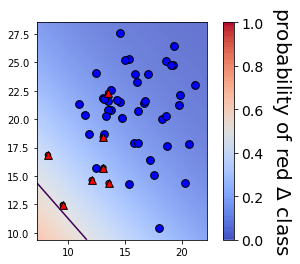

Max prob 0.9685690218313405


In [73]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target

X = X[:50,:2]
y = y[:50]
lr = LogisticRegression(C=0.01)
lr.fit(X, y)
plot_classifier(X, y, lr, proba=True)
prob = lr.predict_proba(X)
print(f'Max prob {np.max(prob)}')

### Multiclass classification  
- **One-vs-Rest** : Predict each class features vs others one by one 
- **Multinomial/Softmax/Cross-entropy loss** : Predict each class in one time

In [82]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

digits = datasets.load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

lr_ovr = LogisticRegression()
lr_ovr.fit(X_train, y_train)

lr_mn = LogisticRegression(multi_class='multinomial')
lr_mn.fit(X_train, y_train)

print(f'One-vs-rest :- tain score {lr_ovr.score(X_train, y_train):.4f}, test score {lr_ovr.score(X_test, y_test):.4f}');
print(f'Multinomial :- tain score {lr_mn.score(X_train, y_train):.4}, test score {lr_mn.score(X_test, y_test):.4f}')

One-vs-rest :- tain score 1.0000, test score 0.9578
Multinomial :- tain score 1.0, test score 0.9578


## SVM
Support vectors are defined as training examples that influence the decision boundary. In this exercise, you'll observe this behavior by removing non support vectors from the training set

In [83]:
from sklearn import datasets
wine = datasets.load_wine()
X, y = wine.data, wine.target
X = X[:,:2]

In [84]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(kernel='linear')

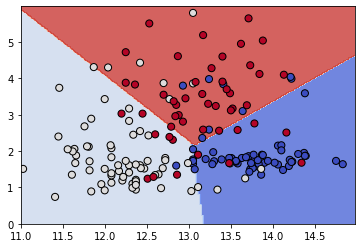

In [85]:
plot_classifier(X, y, svm, lims=(11, 15, 0, 6))

In [86]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]


Number of original examples 178
Number of support vectors 81


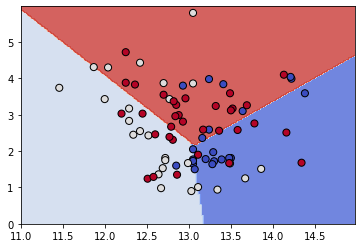

In [89]:
svm_small = SVC(kernel='linear')
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims =(11, 15, 0, 6))

In [94]:
from sklearn import datasets
digits = datasets.load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [92]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()
gridcv = GridSearchCV(svm, {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]})
gridcv.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [93]:
print(gridcv.best_params_)

{'gamma': 0.001}


In [96]:
gridcv = GridSearchCV(svm, {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]})
gridcv.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1]})

In [97]:
print(gridcv.best_params_)
print(gridcv.best_score_)

{'C': 10, 'gamma': 0.001}
0.9910863279636514


In [98]:
gridcv.score(X_test, y_test)

0.9844444444444445

In [99]:
from sklearn.linear_model import SGDClassifier

In [100]:
# We set random_state=0 for reproducibility 
linear_classifier = SGDClassifier(random_state=0)

# Instantiate the GridSearchCV object and run the search
parameters = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
             'loss':['hinge', 'log'], 'penalty':['l1', 'l2']}
searcher = GridSearchCV(linear_classifier, parameters, cv=10)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'alpha': 0.1, 'loss': 'log', 'penalty': 'l2'}
Best CV accuracy 0.9576838032061913
Test accuracy of best grid search hypers: 0.9533333333333334
